#                         Electronics Review Sentiment Analysis
![NLP](https://cdn3d.iconscout.com/3d/premium/thumb/natural-language-processing-nlp-12030931-9851135.png?f=webp)
## Overview

The "Electronics" project is designed to analyze and classify product reviews based on customer feedback. This project aims to provide insights into product sentiment and categorize reviews into different product categories. 

## Objectives

- **Data Preprocessing**: Clean and prepare the review data for analysis.
- **Feature Extraction**: Convert text data into a numerical format using CountVectorizer.
- **Model Training**: Train a Multinomial Naive Bayes model for classification.
- **Model Evaluation**: Evaluate the model's performance using accuracy and confusion matrix.
- **Visualization**: Provide visualizations for data distribution and model performance.


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [99]:
data = pd.read_csv('e-reviw.csv')

print(f'Shape of the data: {data.shape}')
print(f'Original columns: {data.columns}')

data.columns = data.columns.str.strip()
print(f'Available columns: {data.columns}')

if 'reviews\tPR' in data.columns:
    data[['reviews', 'PR']] = data['reviews\tPR'].str.split('\t', expand=True)
    data = data.drop(columns=['reviews\tPR'])

data['PR'] = data['PR'].astype(str).fillna('unknown')

if 'reviews' not in data.columns or 'PR' not in data.columns:
    raise ValueError("Required columns 'reviews' and 'PR' are missing from the data.")



Shape of the data: (30380, 1)
Original columns: Index(['reviews\tPR'], dtype='object')
Available columns: Index(['reviews\tPR'], dtype='object')


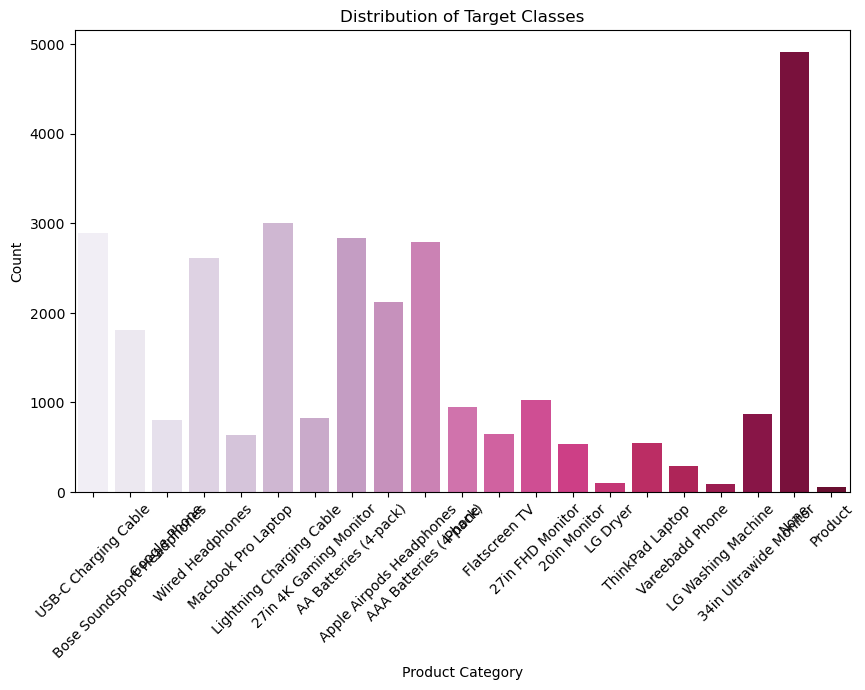

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PR', palette='PuRd')
plt.title('Distribution of Target Classes')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [86]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['reviews'])
y = data['PR']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.25


In [90]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [91]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.25


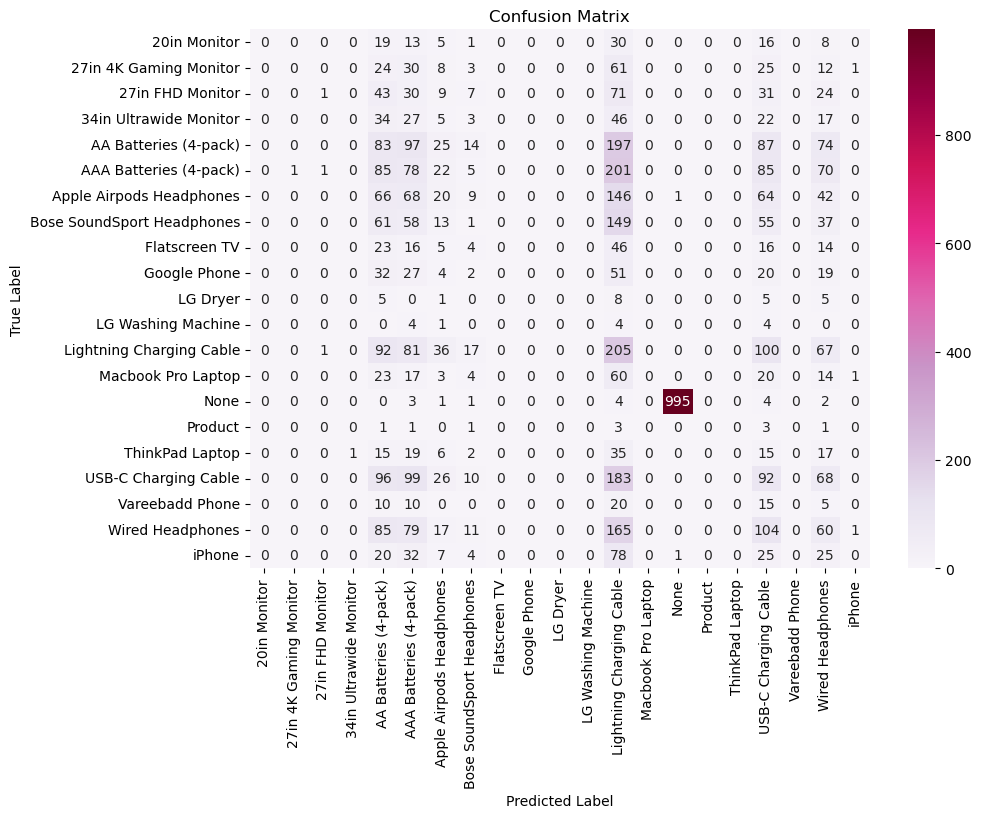

Classification Report:
                            precision    recall  f1-score   support

              20in Monitor       0.00      0.00      0.00        92
    27in 4K Gaming Monitor       0.00      0.00      0.00       164
          27in FHD Monitor       0.33      0.00      0.01       216
    34in Ultrawide Monitor       0.00      0.00      0.00       154
     AA Batteries (4-pack)       0.10      0.14      0.12       577
    AAA Batteries (4-pack)       0.10      0.14      0.12       548
  Apple Airpods Headphones       0.09      0.05      0.06       416
Bose SoundSport Headphones       0.01      0.00      0.00       374
             Flatscreen TV       0.00      0.00      0.00       124
              Google Phone       0.00      0.00      0.00       155
                  LG Dryer       0.00      0.00      0.00        24
        LG Washing Machine       0.00      0.00      0.00        13
  Lightning Charging Cable       0.12      0.34      0.17       599
        Macbook Pro Lapt

/Users/maramal-zahrani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maramal-zahrani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maramal-zahrani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [94]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Classification Report:')
print(classification_report(y_test, y_pred))